In [1]:
import numpy as np
import pandas as pd
import os

import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
from sklearn.neural_network import MLPClassifier
# import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

from sklearn.metrics import confusion_matrix

print("All modules have been imported")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


All modules have been imported


##### Reading the training Labels:- 

In [2]:
train_labels = pd.read_csv("trainLabels.csv")

In [3]:
train_labels

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


####  showing the count of each class:-

In [4]:
train_labels['level'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

#### showing the list of images present in the training dataset:-

In [5]:


for dirname, _, filenames in os.walk('train/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Printing the Distribution of each class Labels:-


<AxesSubplot:ylabel='level'>

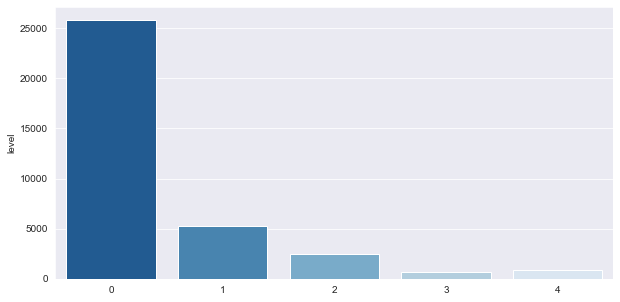

In [6]:
print("Printing the Distribution of each class Labels:-")
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=train_labels.level.unique(),y=train_labels.level.value_counts(),palette='Blues_r',ax=ax)

In [7]:
targets_series = pd.Series(train_labels['level'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [8]:
print('Labels:-')
targets_series[:10]

Labels:-


0    0
1    0
2    0
3    0
4    1
5    2
6    4
7    4
8    0
9    1
Name: level, dtype: int64

In [9]:
print("After One Hot Representation:-")
one_hot[:10]

After One Hot Representation:-


,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,1,0,0,0,0
9,0,1,0,0,0


#### Lets take a look at the array containing just the labels

In [10]:
one_hot_labels = np.asarray(one_hot)
one_hot_labelsY = np.asarray(targets_series)
one_hot_labelsY[:10]

array([0, 0, 0, 0, 1, 2, 4, 4, 0, 1])

1. ## Part 1 - Data Preprocessing

# Preprocessing the Training set

In [27]:
import pandas as pd
import os
import shutil

# Load the labels from the CSV file
train_labels = pd.read_csv('trainLabels.csv')

# Create the subfolders
for i in range(5):
    os.makedirs(str(i), exist_ok=True)

# Move the images to the appropriate subfolders
try:
    for index, row in train_labels.iterrows():
        image_file = row['image']
        image_file=image_file+".jpeg"
        label = row['level']
        shutil.move(image_file, str(label))
else:
    pass
    
    


In [28]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode='nearest')
training_set = train_datagen.flow_from_directory('/Users/siddharthachakraborty/Desktop/Trainings/ **Projects** /Computer Vision/Diabetic Retinopathy/Diabetic_Retinopathy/data/train 3',
#                                                  target_size = (64, 64),
                                                 target_size=(224,224),
#                                                  batch_size = 32,
                                                 batch_size = 100,
                                                 class_mode = 'categorical',
                                                shuffle=True)

training_set[0]

Found 1964 images belonging to 5 classes.


(array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

#### Lets just verify one of the images from the numpy array

In [17]:
plt.imshow(x_train[5]/255) #681 > Try some other number too 
plt.show()

IndexError: list index out of range

# Preprocessing the Test set

In [30]:
x_test=[]
#this is a OpenCV implementation
i = 0 
for f, breed in tqdm(train_labels.values):
    if type(cv2.imread('/storage/test/{}.jpeg'.format(f)))==type(None):
        continue
    else:
        img = cv2.imread('/storage/test/{}.jpeg'.format(f))
        label = one_hot_labels[i]
        x_test.append(cv2.resize(img, (im_size1, im_size2)))
        i += 1
np.save('x_test',x_test)
print('Done')

# i=0
# for f, breed in tqdm(test_labels.values):
#     try:
#         img = image.load_img(('train/{}.jpeg'.format(f)), target_size=(786, 786))
#         arr = image.img_to_array(img)
#         label = one_hot_labelsY[i]
#         x_train.append(arr)
#         y_train.append(label)
#         i += 1 
#     except:
#         pass

100%|██████████| 35126/35126 [00:04<00:00, 7099.12it/s]

Done


In [31]:
# test_datagen = ImageDataGenerator(rescale = 1./255)
# test_set = test_datagen.flow_from_directory('/Users/siddharthachakraborty/Desktop/Deep Learning Project Work Wipro/Diabetic Retinopathy/LATEST DATASET from Bikash/datasets/val',
# #                                             target_size = (64, 64),
#                                             target_size= (224, 224),
#                                             batch_size=100,
# #                                             batch_size = 32,
#                                             class_mode = 'categorical',
#                                            shuffle=True)
# test_set[0]

 ## 2. Part 2 - Building the CNN

In [32]:
# follow from line 15 of the 


In [33]:
# dnn_model=Sequential()
# ##. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# dnn_model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu' ))
# ## https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
# dnn_model.add(BatchNormalization())
# ## https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
# dnn_model.add(Dropout(0.2))
# dnn_model.build(64,64)
# dnn_model.summary()

In [21]:
'''Initialise the CNN.,;;'''

cnn =  tf.keras.models.Sequential() ## helps in creating an AA; as a sequence of layers;.,

'''Covolution.,::--;;'''

## The convolutional layer will be an object of the / a certain class; which is.,;; the Conv2D class; --> this asks the Dense class --> to build a fully connected layer; belongs to the same module,i.e.,;/or.,; "Layers" module from the Keras library.,;;..,,,,..from this time; TensorFlow;2.0.,;;
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3] )) ## Only change that we need to change is that; "activation" parameter;., which obviously corresponds to the Activation Function.,;; because based on a general rule; as long as; we haven't reached the output layer; we would rather wanna get a "rectifier" activation function.,; .!!.,; --> and for this one; we will choose the "RELU" parameter name.,; which corresponds to the.,; rectifier activation functionm.,.!!.,; 
## input_shape being = (64,64,3)## Ssince it is a coloured image; and for b&w images.,; it should have been.,;:-:-  (64,64,1).!!.,;
## the kernel size is considered as 3*3;., hence given the respective parameter input values.,;

'''Pooling:-'''

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) ## the parameters to be mentioned within the "MaxPool2D()" class.,; are :- <1,.> the pooled feature map size.,; ,.., and the <2,.> is the stride size/lenth/values(1).!!.,; 
## Well.,; for this we need to call the add method;., becuase.,;/since.,; we are adding our pooling layers to our convolutional layers.,;;..,, as next step in the/this "sequence of layers.,;;.,;;"
## Note that.,; Asa the new object or the instance of a class is added; calleed as the maxpool2D class.,; which belongs to previously/above., mentioned layers module.,;


## Adding a second cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a third cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a fourth cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a fifth    cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a sixth cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a seventh!!..,,;; cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding an eighth cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a ninth cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a tenth.!!.,;!!..,,;; cConvolutional Layer.,;;::--
cnn.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, activation='relu'  )) ## only difference is that while creating the second CNN.,; we do not need/have to give the input_shape as an input.,;; since.,;; it is only required for the very fiorst time.!!.,;;,;;
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

'''Flattening.,::--'''
cnn.add(tf.keras.layers.Flatten())## done using a class called Flatten() class.,;,.!!.,;;

'''Step 4.,:-:- Full Connection.,;,.!!.,;;'''
cnn.add(tf.keras.layers.Dense(units=128,activation='relu' ))## So the first/1st parameter.,; contains the number of hidden neurons that you will have into this newly fully connected layer.,;  2nd is the activation function
## Therefore;., now we are creating/add a new layer;., which is a fully connected layer.,;; and it still belongs to the tf.keras layers; 

'''Step 5.,;;::--'''
'''Output Layer'''
cnn.add(tf.keras.layers.Dense(units=5,activation='sigmoid' )) ## since binary classification hence we only need 5 Neural Networks ..,,;;;;..,,!!..,,;;;;

ValueError: Exception encountered when calling layer "conv2d_9" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_9/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_9/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [3,3,32,32].

Call arguments received by layer "conv2d_9" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 32), dtype=float32)